## Imports

In [1]:
import numpy as np
import cv2
import tensorflow as tf
import keras
from keras import backend as K

from skimage.io import imread
from skimage.transform import resize

from matplotlib import pyplot as plt

import os

## Load and Recompile Model

In [2]:
labels = ["Neutral","Happy","Sad","Surprise","Fear","Anger"]

model = tf.keras.models.load_model('models/model_4.h5', compile=False)

# Include custom loss to compile the model again
# Create custom loss function
def weighted_categorical_crossentropy(weights):
    weights = K.variable(weights)

    def loss(y_true, y_pred):
        # scale predictions so that the class probas of each sample sum to 1
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
        # clip to prevent NaN's and Inf's
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        # calc
        loss = y_true * K.log(y_pred) * weights
        loss = -K.sum(loss, -1)
        return loss
    return loss

# Set Flag for weighted or regular loss
loss_flag = 'weights'

if loss_flag == 'no_weights':
    weights = np.array([1, 1, 1, 1, 1, 1])
elif loss_flag == 'weights':
    weights = np.array([0.802518525169482, 0.802092227896231, 0.866721731456969,
                        1.0450040554419, 1.6127733638543, 0.870890096181114])

# Compile Model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=weighted_categorical_crossentropy(weights), metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

## Test Model on Images in Directory

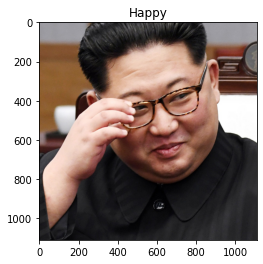

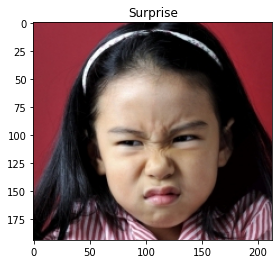

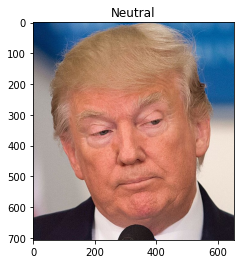

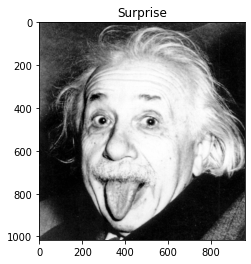

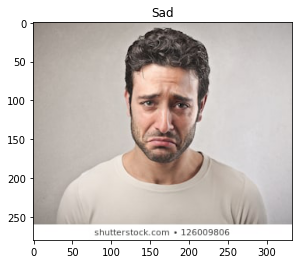

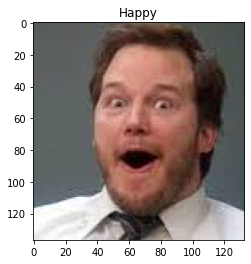

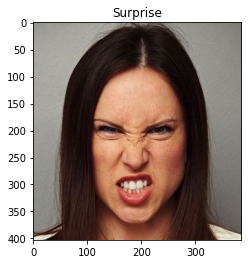

In [3]:
# Test model on individual images

path = '/Users/jonathangiguere/Desktop/DATS 6501/capstone jupyter/images/'

for file in os.listdir(path):
    if file.endswith('.jpg'):
        img_orig = np.array(imread(path + file)) 
        img = np.array(resize(imread(path + file), (256, 256, 3))) 
        label = labels[model.predict((np.array([img]))/ 255.0).argmax()]
        plt.imshow(img_orig)
        plt.title(label)
        plt.show()

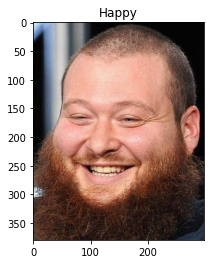

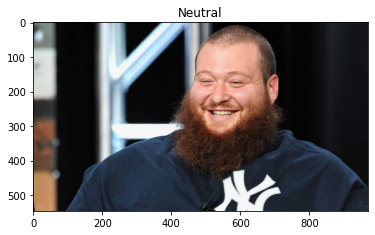

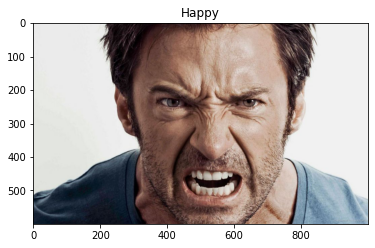

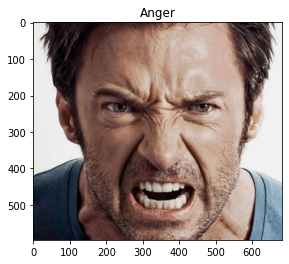

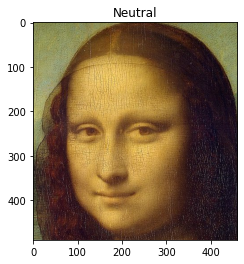

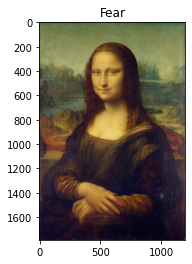

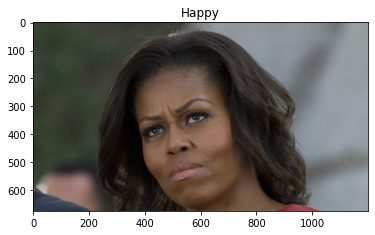

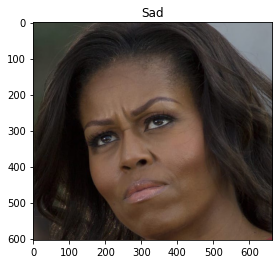

In [4]:
# Test model on cropped images

path = '/Users/jonathangiguere/Desktop/DATS 6501/capstone jupyter/images_2/'

for file in os.listdir(path):
    if file.endswith('.jpg'):
        img_orig = np.array(imread(path + file)) 
        img = np.array(resize(imread(path + file), (256, 256, 3))) 
        label = labels[model.predict((np.array([img]))/ 255.0).argmax()]
        plt.imshow(img_orig)
        plt.title(label)
        plt.show()